In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from src.word_embedding_utils_v2 import clean_html_tags, remove_white_spaces

#### Load in the Data

In [2]:
tags = '/Users/dentonzhao/Downloads/Tags.csv'
posts = '/Users/dentonzhao/Downloads/Questions.csv'

In [3]:
tag_df = pd.read_csv(tags, encoding='latin-1')
tag_df.head(2)

,Id,Tag
0,80,flex
1,80,actionscript-3


In [17]:
df= pd.read_csv(posts, encoding='latin-1')
df.head(2)
df[df['Id']==260]

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [5]:
#from above we see the tags and ids are split. Lets fix this real quick:

data = pd.merge(df, tag_df, how='inner', on='Id')
print(data.shape)
print("There are {} unique tags".format(len(data['Tag'].unique())))

(3750994, 8)
There are 37036 unique tags


#### Too many tags, Lets try to build a classifier for the top 15

In [6]:
top_15 = list(data['Tag'].value_counts()[:15].index)

relevant_posts = data[data['Tag'].isin(top_15)].reset_index()
relevant_posts.shape

(1004185, 9)

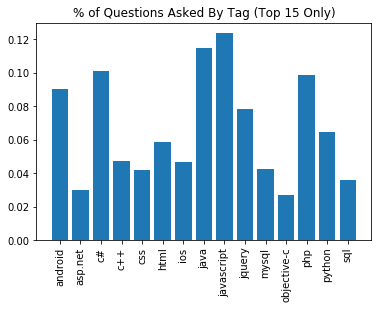

In [12]:
#This will be primarily an NLP approach, lets worry only about the ID, Title, Body and Tag

relevant_posts = relevant_posts[['Id', 'Title', 'Body', 'Tag']]

#We'll plot the number of tags by percentage
tag_counts =relevant_posts['Tag'].value_counts()

tag_percentage = tag_counts/(tag_counts.sum())

# tag_counts = relevant_posts['Tag'].value_counts()
plt.bar(tag_percentage.index, (tag_percentage.values))
plt.xticks(rotation=90)
plt.title('% of Questions Asked By Tag (Top 15 Only)')
None

In [15]:
relevant_posts['Text'] = relevant_posts['Title'] + " " + relevant_posts['Body']
relevant_posts['Text'] = relevant_posts['Text'].apply(clean_html_tags).str.lower()
relevant_posts['Text'] = relevant_posts['Text'].apply(remove_white_spaces)
relevant_posts = relevant_posts[['Id', 'Text', 'Tag']]
relevant_posts.head(3)

,Id,Text,Tag
0,120,asp.net site maps has anyone got experience cr...,sql
1,120,asp.net site maps has anyone got experience cr...,asp.net
2,260,adding scripting functionality to .net applica...,c#
